In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('ex1data2.txt', header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [3]:
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [4]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [5]:
theta = np.array([0]*len(X.columns))
#Output: array([0, 0, 0])

In [6]:
m = len(df)

In [7]:
def hypothesis(theta, X):
    return theta*X

In [8]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [9]:
computeCost(X,y,theta)

170206.32978723405

In [10]:
X.iloc[:,1]

0     0.469853
1     0.357302
2     0.535954
3     0.316213
4     0.669942
5     0.443278
6     0.342564
7     0.318669
8     0.308173
9     0.333631
10    0.433229
11    0.446628
12    0.422063
13    1.000000
14    0.283162
15    0.513622
16    0.294774
17    0.276016
18    0.582626
19    0.676865
20    0.394596
21    0.421617
22    0.358196
23    0.438142
24    0.868691
25    0.245645
26    0.325592
27    0.564091
28    0.491291
29    0.588879
30    0.410674
31    0.223314
32    0.455561
33    0.700536
34    0.404422
35    0.320902
36    0.276686
37    0.476105
38    0.941268
39    0.482805
40    0.371594
41    0.499777
42    0.573247
43    0.267977
44    0.190264
45    0.413577
46    0.268647
Name: 0, dtype: float64

In [11]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [12]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [13]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

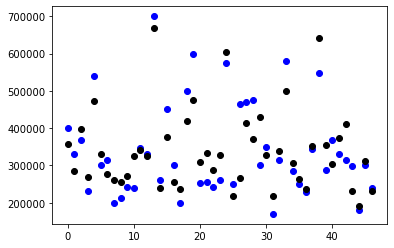

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black')
plt.show()

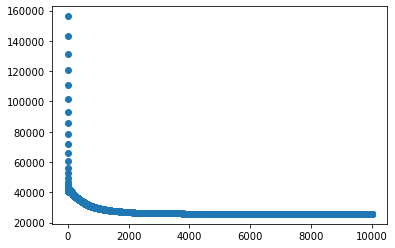

In [15]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()